In [32]:
from numpy.testing import assert_array_almost_equal
import mne
from mne.export import export_raw

from pathlib import Path
from pprint import pprint
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
sourcedir = Path("/Users/adam2392/Johns Hopkins/Scalp EEG JHH - Documents/40Hz-10/sourcedata")
eeglab_fpaths = sourcedir.glob("*.set")
outdir = Path("/Users/adam2392/Downloads/edf_write_validation/derivatives/edf")

In [35]:
for fpath in eeglab_fpaths:
    new_fpath = outdir / (fpath.with_suffix('.edf').name)
    raw = mne.io.read_raw_eeglab(fpath)
    
    outdir.mkdir(exist_ok=True, parents=True)
    export_raw(new_fpath, raw, fmt='edf')
    new_raw = mne.io.read_raw_edf(new_fpath)
    
    assert_array_almost_equal(new_raw.get_data(units='uV'), raw.get_data(units='uV'), decimal=1)
    break

Reading /Users/adam2392/Johns Hopkins/Scalp EEG JHH - Documents/40Hz-10/sourcedata/018.fdt
Reading 0 ... 59999  =      0.000 ...   299.995 secs...
Extracting EDF parameters from /Users/adam2392/Downloads/edf_write_validation/derivatives/edf/018.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [15]:
print(raw.info['sfreq'])
print(raw)
print(new_raw)

200.0
<RawEEGLAB | 108.fdt, 19 x 60001 (300.0 s), ~8.7 MB, data loaded>
<RawEDF | 108.edf, 19 x 60000 (300.0 s), ~23 kB, data not loaded>


In [16]:
assert raw.info == new_raw.info

AssertionError: 

In [17]:
raw.info

print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 19 items (19 EEG)
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 200.0 Hz
>


In [18]:
# print([raw.info['chs'][idx]['cal'] for idx in range(len(raw.ch_names))])

print(raw.info['chs'][0]['cal'] / 2)
# pprint(raw.info['chs'])

5e-07


In [19]:
print(new_raw.times)

[0.00000e+00 5.00000e-03 1.00000e-02 ... 2.99985e+02 2.99990e+02
 2.99995e+02]


# Compare Plots

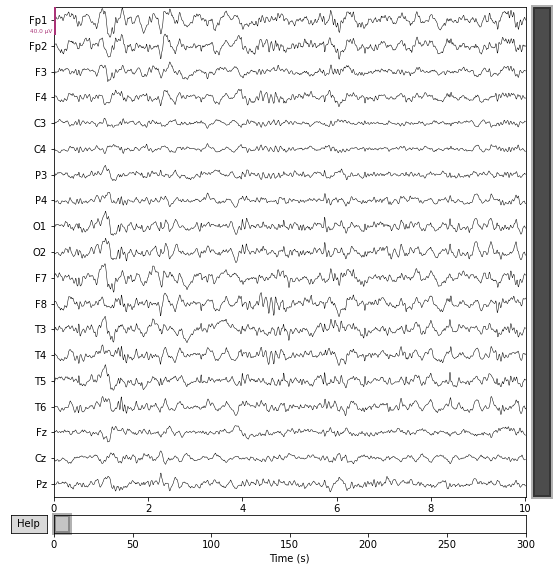

done


In [33]:
raw.plot()
print('done')

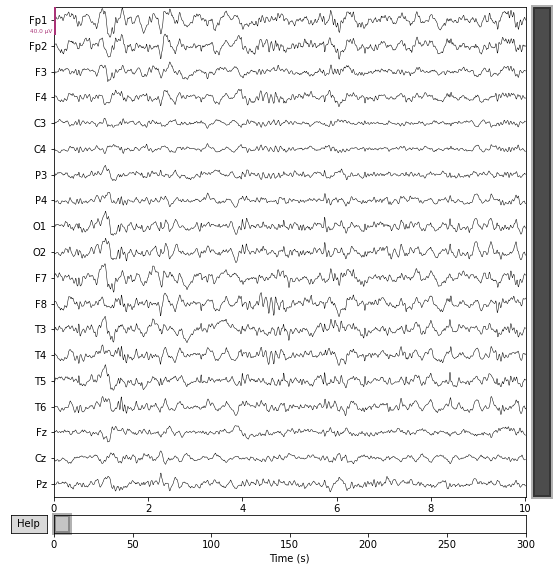

done


In [34]:
new_raw.plot()
print('done')